# Importing Libraries

In [82]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Importing csv data as dataframes

In [83]:
df = pd.read_csv('data.csv')

In [84]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [86]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [87]:
print(df['InternetService'].value_counts(normalize=True))

InternetService
Fiber Optic    0.561878
DSL            0.438122
Name: proportion, dtype: float64


In [88]:
df['InternetService'].unique()

array(['Fiber Optic', 'DSL', nan], dtype=object)

In [89]:
df.groupby('ContractType')['InternetService'].value_counts(normalize=True)

ContractType    InternetService
Month-to-Month  Fiber Optic        0.563739
                DSL                0.436261
One-Year        Fiber Optic        0.587940
                DSL                0.412060
Two-Year        Fiber Optic        0.523179
                DSL                0.476821
Name: proportion, dtype: float64

In [90]:
df.groupby(pd.cut(df['MonthlyCharges'], bins=5))['InternetService'].value_counts(normalize=True)

MonthlyCharges     InternetService
(29.91, 47.992]    Fiber Optic        0.554054
                   DSL                0.445946
(47.992, 65.984]   Fiber Optic        0.526667
                   DSL                0.473333
(65.984, 83.976]   Fiber Optic        0.530303
                   DSL                0.469697
(83.976, 101.968]  Fiber Optic        0.600000
                   DSL                0.400000
(101.968, 119.96]  Fiber Optic        0.601449
                   DSL                0.398551
Name: proportion, dtype: float64

In [91]:
import numpy as np

# Get the proportions of existing values
proportions = df['InternetService'].value_counts(normalize=True)

# Sample from the existing values based on their proportions
missing_count = df['InternetService'].isna().sum()
imputed_values = np.random.choice(proportions.index, size=missing_count, p=proportions.values)

# Assign imputed values
df.loc[df['InternetService'].isna(), 'InternetService'] = imputed_values

In [92]:
print(df['InternetService'].value_counts(normalize=True))

InternetService
Fiber Optic    0.561
DSL            0.439
Name: proportion, dtype: float64


In [93]:
print(df.describe())

        CustomerID          Age      Tenure  MonthlyCharges  TotalCharges
count  1000.000000  1000.000000  1000.00000     1000.000000   1000.000000
mean    500.500000    44.674000    18.97300       74.391290   1404.364060
std     288.819436     9.797741    18.89257       25.712083   1571.755048
min       1.000000    12.000000     0.00000       30.000000      0.000000
25%     250.750000    38.000000     5.00000       52.357500    345.217500
50%     500.500000    45.000000    13.00000       74.060000    872.870000
75%     750.250000    51.000000    26.00000       96.102500   1900.175000
max    1000.000000    83.000000   122.00000      119.960000  12416.250000


Text(0.5, 1.0, 'churn rate by contract')

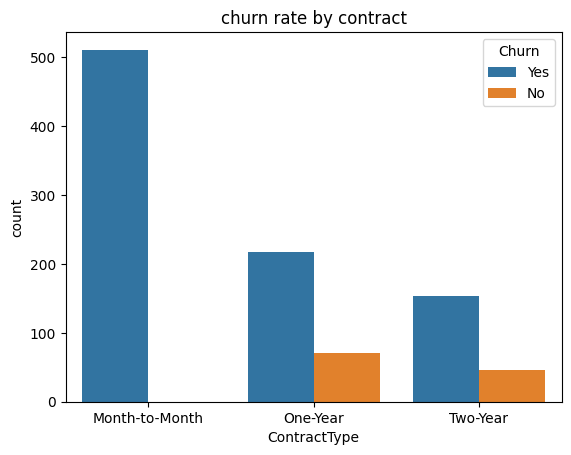

In [94]:
sns.countplot(data=df,x='ContractType',hue='Churn')
plt.title('churn rate by contract')

In [95]:
def age_group(age):
    if age<30:
        return 'young'
    elif 30<age<50:
        return 'middle_aged'
    else:
        return 'senior'
    
df['AgeGroup']=df['Age'].apply(age_group)    

In [96]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn,AgeGroup
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes,middle_aged
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes,middle_aged
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes,senior
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes,senior
4,5,42,Male,32,69.01,Month-to-Month,Fiber Optic,2208.32,No,Yes,middle_aged
...,...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes,middle_aged
996,997,62,Male,9,80.93,Month-to-Month,Fiber Optic,728.37,No,Yes,senior
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes,senior
998,999,39,Male,68,65.67,One-Year,DSL,4465.56,No,Yes,middle_aged


In [97]:
df['TotalChargesPerMonth']=df['TotalCharges']/df['Tenure'].replace(0,1)

In [98]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn,AgeGroup,TotalChargesPerMonth
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes,middle_aged,88.35
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes,middle_aged,0.00
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes,senior,63.79
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes,senior,102.34
4,5,42,Male,32,69.01,Month-to-Month,Fiber Optic,2208.32,No,Yes,middle_aged,69.01


In [99]:
df.drop(columns='Age',inplace=True)

In [100]:
df

,CustomerID,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn,AgeGroup,TotalChargesPerMonth
0,1,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes,middle_aged,88.35
1,2,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes,middle_aged,0.00
2,3,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes,senior,63.79
3,4,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes,senior,102.34
4,5,Male,32,69.01,Month-to-Month,Fiber Optic,2208.32,No,Yes,middle_aged,69.01
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes,middle_aged,37.14
996,997,Male,9,80.93,Month-to-Month,Fiber Optic,728.37,No,Yes,senior,80.93
997,998,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes,senior,111.72
998,999,Male,68,65.67,One-Year,DSL,4465.56,No,Yes,middle_aged,65.67


In [101]:
df['InternetService'].unique()

array(['Fiber Optic', 'DSL'], dtype=object)

In [102]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})
df['AgeGroup'] = df['AgeGroup'].map({'young':0,'middle_aged':1,'senior':2})
df['TechSupport'] = df['TechSupport'].map({'Yes':1,'No':0})
df['ContractType'] = df['ContractType'].map({'Month-to-Month':0, 'One-Year':1, 'Two-Year':2})
df['InternetService'] = df['InternetService'].map({'Fiber Optic':0, 'DSL':1})
df['Gender']=df['Gender'].map({'Male':1,'Female':2})

In [103]:
df

,CustomerID,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn,AgeGroup,TotalChargesPerMonth
0,1,1,4,88.35,0,0,353.40,1,1,1,88.35
1,2,1,0,36.67,0,0,0.00,1,1,1,0.00
2,3,2,2,63.79,0,0,127.58,0,1,2,63.79
3,4,2,8,102.34,1,1,818.72,1,1,2,102.34
4,5,1,32,69.01,0,0,2208.32,0,1,1,69.01
...,...,...,...,...,...,...,...,...,...,...,...
995,996,1,41,37.14,0,0,1522.74,1,1,1,37.14
996,997,1,9,80.93,0,0,728.37,0,1,2,80.93
997,998,2,15,111.72,0,0,1675.80,1,1,2,111.72
998,999,1,68,65.67,1,1,4465.56,0,1,1,65.67


In [104]:
corr_matrix=df[['Gender','Tenure','MonthlyCharges','ContractType','InternetService','TotalCharges','TechSupport','Churn','AgeGroup','TotalChargesPerMonth']].corr()

<Axes: >

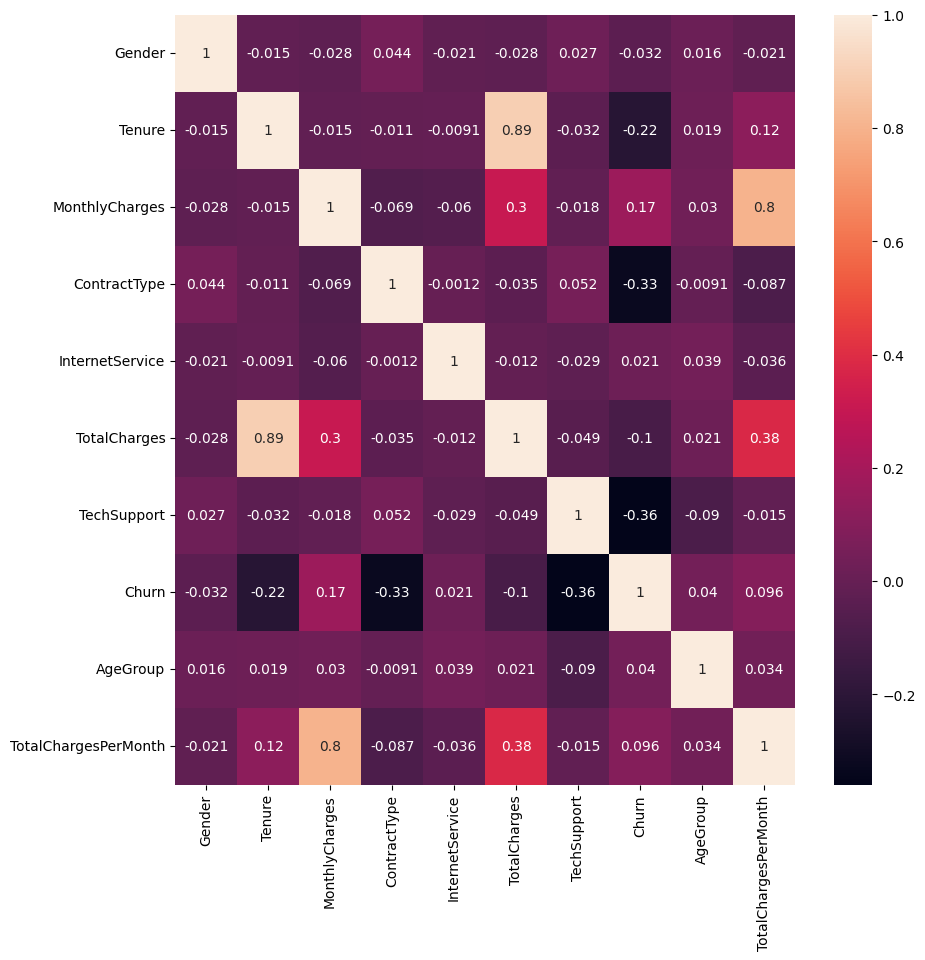

In [105]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)

# Tenure,MonthlyCharges and TotalCharges show a high correlation 

In [106]:
df.drop(columns='TotalCharges',inplace=True)
df.drop(columns='MonthlyCharges',inplace=True)

In [107]:
df

,CustomerID,Gender,Tenure,ContractType,InternetService,TechSupport,Churn,AgeGroup,TotalChargesPerMonth
0,1,1,4,0,0,1,1,1,88.35
1,2,1,0,0,0,1,1,1,0.00
2,3,2,2,0,0,0,1,2,63.79
3,4,2,8,1,1,1,1,2,102.34
4,5,1,32,0,0,0,1,1,69.01
...,...,...,...,...,...,...,...,...,...
995,996,1,41,0,0,1,1,1,37.14
996,997,1,9,0,0,0,1,2,80.93
997,998,2,15,0,0,1,1,2,111.72
998,999,1,68,1,1,0,1,1,65.67


In [112]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df[['Tenure', 'TotalChargesPerMonth']] = scaler.fit_transform(df[['Tenure', 'TotalChargesPerMonth']])


ModuleNotFoundError: No module named 'sklearn'